In [7]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
from scipy.ndimage import label


def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None;
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [8]:
import os
import glob
import re
import pandas as pd

# Define pattern to match values from lines
# prob_pattern = r"Probability: P\(mass <= max_mass\(spin, eos\)\) = ([\d\.eE+-]+) \+/- ([\d\.eE+-]+)"
# odds_pattern = r"Odds Ratio\s*:.*= ([\d\.eE+-]+) \+/- ([\d\.eE+-]+)"
prob_pattern = r"Probability: P\(.*?\) = ([0-9.eE+-]+) \+/- ([0-9.eE+-]+)"
odds_pattern = r"Odds Ratio\s*:.*?= ([0-9.eE+-]+) \+/- ([0-9.eE+-]+)"


# Create list to hold parsed data
data = []

# Loop through all .out files
for filepath in glob.glob("*.out"):
    with open(filepath, "r") as f:
        content = f.read()
        prob_match = re.search(prob_pattern, content)
        odds_match = re.search(odds_pattern, content)

        if prob_match and odds_match:
            prob, prob_err = map(float, prob_match.groups())
            odds, odds_err = map(float, odds_match.groups())
            data.append({
                "filename": filepath,
                "probability": prob,
                "prob_error": prob_err,
                "odds_ratio": odds,
                "odds_error": odds_err
            })
        else:
            print(f"Warning: Could not parse values from {filepath}")

# Convert to pandas DataFrame
df = pd.DataFrame(data)


In [9]:
df

,filename,probability,prob_error,odds_ratio,odds_error
0,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.857210,0.005294,6.003270,0.259624
1,GW190814_C01:IMRPhenomXPHM+multiPDB_betaSplit_...,0.080095,0.005099,0.087069,0.006026
2,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.819931,0.006195,4.553435,0.191046
3,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.819509,0.006388,4.540456,0.196101
4,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.827397,0.006059,4.793643,0.203378
5,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.816456,0.006529,4.448296,0.193800
6,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.824497,0.006083,4.697908,0.197494
7,GW230529_Combined_PHM_highSpin+multiPDB_betaSp...,0.010585,0.002894,0.010698,0.002956
8,GW230529_Combined_PHM_highSpin+multiPDB_betaSp...,0.009895,0.002586,0.009994,0.002638
9,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+mul...,0.818624,0.006476,4.513422,0.196866


In [10]:
pop_parameter = "gamma_low" 
df[pop_parameter] = df["filename"].str.extract(f"{pop_parameter}"r"\+([\d.]+)").astype(float)
df["event"] = df["filename"].str.extract(r"^(GW\d+)")
df["component"] = df["filename"].str.extract(r"component(\d+)").astype(int)

In [11]:
GW190917_m1 = df[(df['event'] == "GW190917") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190917_m2 = df[(df['event'] == "GW190917") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW230529_m1 = df[(df['event'] == "GW230529") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190814_m2 = df[(df['event'] == "GW190814") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190425_m1 = df[(df['event'] == "GW190425") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190425_m2 = df[(df['event'] == "GW190425") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW200105_m1 = df[(df['event'] == "GW200105") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW200105_m2 = df[(df['event'] == "GW200105") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW200115_m2 = df[(df['event'] == "GW200115") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)

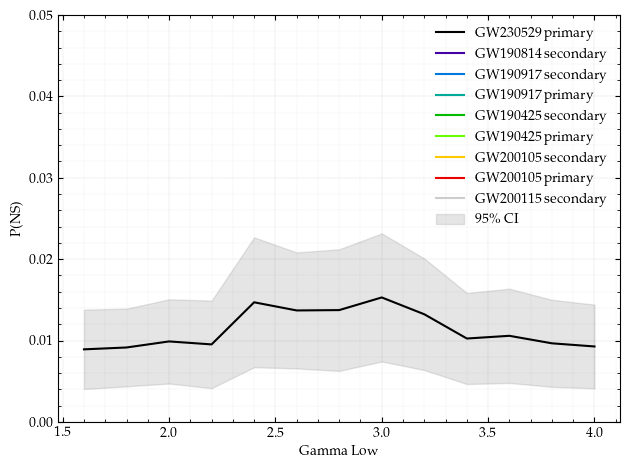

In [12]:
plt.figure()
objects_lst = [GW230529_m1, GW190814_m2, GW190917_m2, GW190917_m1, GW190425_m2, GW190425_m1, GW200105_m2, GW200105_m1, GW200115_m2]
objects_names = ["GW230529 primary", "GW190814 secondary", "GW190917 secondary", "GW190917 primary", "GW190425 secondary", "GW190425 primary", "GW200105 secondary", "GW200105 primary", "GW200115 secondary"]
objects_colors = [ plt.get_cmap("nipy_spectral")(i / (len(objects_lst) - 1)) for i in range(len(objects_lst))]

for i in range(len(objects_lst)):
    curr = objects_lst[i]
    curr_name = objects_names[i]
    p05 = curr["probability"] - curr["prob_error"] * 2
    p95 = curr["probability"] + curr["prob_error"] * 2
    if i == len(objects_lst) - 1:
        lab = "95\% CI"
    else:
        lab = None
    plt.plot(curr[pop_parameter], curr["probability"], label=curr_name, color = objects_colors[i])
    plt.fill_between(curr[pop_parameter], p05, p95, color="grey", alpha=0.2, label=lab)

plt.ylabel("P(NS)")
plt.xlabel("Gamma Low")
plt.ylim(0, 0.05)
plt.utkarshWrapper()
plt.savefig("../grid_plots/gamma_low_EOS.png") 
plt.show()